In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# PERFORMING EDA ON MY DATASET
sal=df['salary'].unique()
dep=df['Department'].unique()
print(sal)
print(dep)

['low' 'medium' 'high']
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


<Axes: xlabel='salary'>

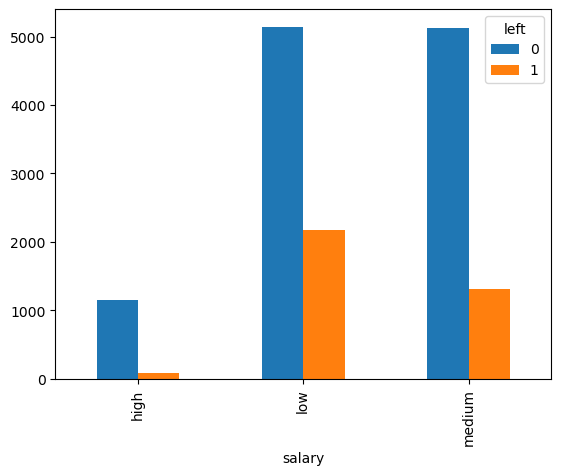

In [9]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [10]:
counts = df[df['left'] == 1]['left'].value_counts()
counts

left
1    3571
Name: count, dtype: int64

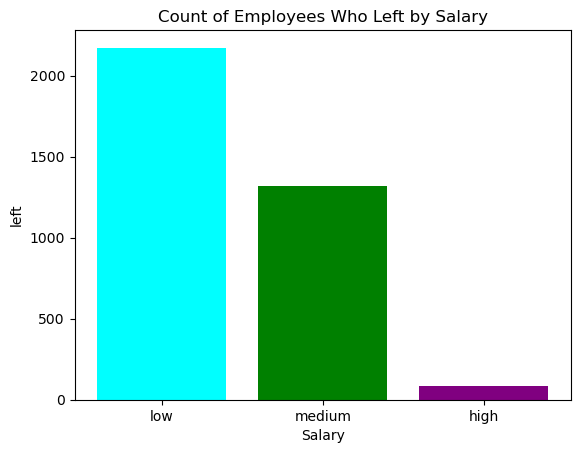

In [12]:
# quiz 1 does the slary affect the status?
# Filter DataFrame to include only rows where 'left' == 1
filtered_df = df[df['left'] == 1]
# Count occurrences of each salary
count = filtered_df['salary'].value_counts()
# Prepare data for plotting
x = count.index
y = count.values
colors=['cyan','green','purple']
# Create bar plot
plt.bar(x, y , color=colors)
plt.xlabel('Salary')
plt.ylabel('left')
plt.title('Count of Employees Who Left by Salary')
plt.show()

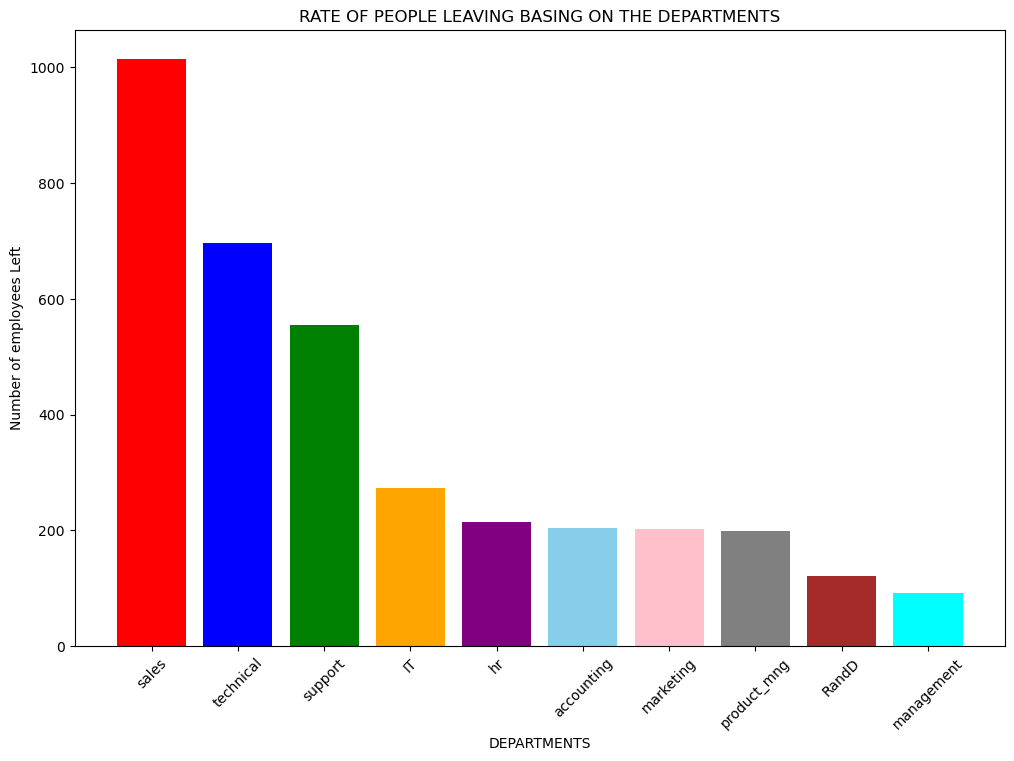

In [14]:
filter=df[df['left']==1]
# get the peoples departments 
depart=filter['Department'].value_counts()
x=depart.index
y=depart.values
colors = ['red', 'blue', 'green', 'orange', 'purple','skyblue','pink','gray', 'brown', 'cyan']
plt.figure(figsize=(12,8))
plt.bar(x,y,color=colors)
plt.xlabel('DEPARTMENTS')
plt.ylabel('Number of employees Left')
plt.title('RATE OF PEOPLE LEAVING BASING ON THE DEPARTMENTS')
plt.xticks(rotation=45)
plt.show()

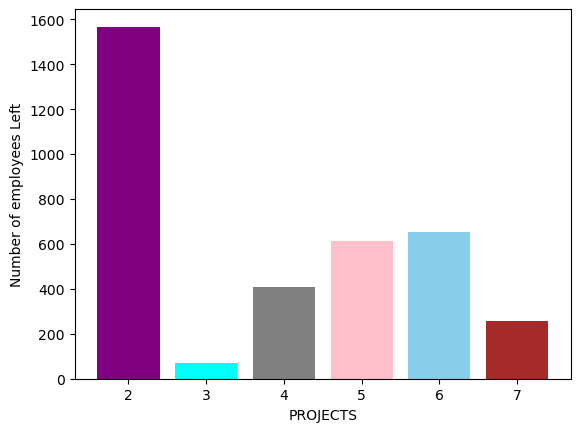

In [16]:
filter=df[df['left']==1]
projects=filter['number_project'].value_counts()
x=projects.index
y=projects.values
colors = ['purple','skyblue','pink','gray', 'brown', 'cyan']
plt.bar(x,y , color=colors)
plt.xlabel('PROJECTS')
plt.ylabel('Number of employees Left')
plt.show()

In [17]:
droping=df[['satisfaction_level', 'last_evaluation','average_montly_hours','Work_accident','promotion_last_5years']]
df=df.drop(droping,axis='columns')

In [19]:
df.columns

Index(['number_project', 'time_spend_company', 'left', 'Department', 'salary'], dtype='object')

In [23]:
# encode the department and the salary 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded=df['salary']
df['salary']=le.fit_transform(encoded)

<Axes: xlabel='Department'>

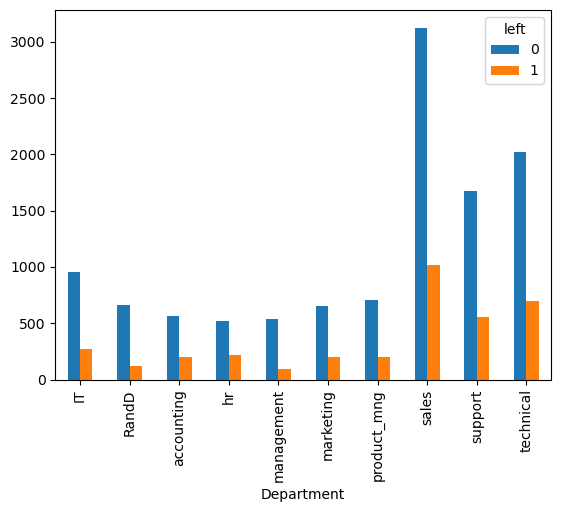

In [24]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [25]:
df

,number_project,time_spend_company,left,Department,salary
0,2,3,1,sales,1
1,5,6,1,sales,2
2,7,4,1,sales,2
3,5,5,1,sales,1
4,2,3,1,sales,1
...,...,...,...,...,...
14994,2,3,1,support,1
14995,2,3,1,support,1
14996,2,3,1,support,1
14997,6,4,1,support,1


In [27]:
# perform encoding on department columns 
dummies=pd.get_dummies(df.Department).astype(int)
merged=pd.concat([df,dummies],axis=1)
droping=merged[['Department','IT']]
merged=merged.drop(droping,axis='columns')

In [28]:
merged.columns

Index(['number_project', 'time_spend_company', 'left', 'salary', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical'],
      dtype='object')

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# split the data to test and train 10,90%
x=merged[['number_project', 'time_spend_company', 'salary', 'RandD', 'accounting', 'hr', 'management', 'marketing','product_mng', 'sales', 'support', 'technical']]
y=merged['left']
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.1)

In [34]:
len(xtrain)

13499

In [37]:
len(xtest)

1500

In [39]:
len(ytrain)

13499

In [41]:
len(ytest)

1500

In [43]:
# my model 
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [45]:
new = [{'number_project':2, 'time_spend_company':3,'salary':1, 'RandD':0,
       'accounting':0, 'hr':0, 'management':0, 'marketing':0, 'product_mng':0, 'sales':1,
       'support':0, 'technical':0}]
new_df = pd.DataFrame(new)
new_df = new_df[['number_project', 'time_spend_company', 'salary', 'RandD', 'accounting', 'hr',
                 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']]
model.predict(new_df)

array([0], dtype=int64)

In [47]:
#MODEL ACCURACY IS 

In [49]:
print("MODEL ACCURACY : ")
model.score(x,y)

MODEL ACCURACY : 


0.7509833988932596